## DES LIGNES DE DIVISION AU NEURONAL RÉSEAUX

###  Ligne de séparation

On veut construire une ligne qui sépare un jeu de données de deux classes(orange, citron) et qui soit capable de prédire pour de nouvelles entrées 

### Le programme Python suivant trace un graphique illustrant la situation décrite dans le tutoriel:

Une droite qui a pour vecteur directeur (4,4.5) et qui passe bien entre deux classes

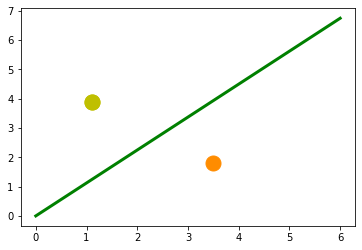

In [85]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 7)
fig, ax = plt.subplots()
ax.plot(3.5, 1.8, "or",color="darkorange",markersize=15) # La première classe
ax.plot(1.1, 3.9, "oy",markersize=15) # La deuxième classe
point_on_line = (4, 4.5) # Le vecteur directeur en question
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3) # La droite qui sépare 
plt.show()


### Après la construction de notre ligne de séparation, on veut chercher à savoir si un point appartient à la droite ou pas, si le point est au dessus de la droite ou en dessous de la droite avec les règles que nous connaissons tous:

Nous pouvons dire que: Le point P(p1, p2) est :

• En dessous de la droite si **m ⋅ p1− p2 > 0** 

• Sur la ligne si **m ⋅ p1− p2 = 0**

• Au dessus de la ligne si  **m ⋅ p1− p2 < 0**

### Code python qui fera ce genre de vérification::
Pour le citron et l'orange qui ont pour coordonnées respectives: (1.1, 3.9) et (3.5, 1.8)

m = 4.5/4


In [86]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])
# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

# On voit que l'orange est en dessous de la courbe pourtant le lemon est au dessus de la courbe

2.1375
-2.6624999999999996


## Calcul et affichage d'un tas de ligne afin de visualiser la bonne droite c'est à dire celle qui sépare bien

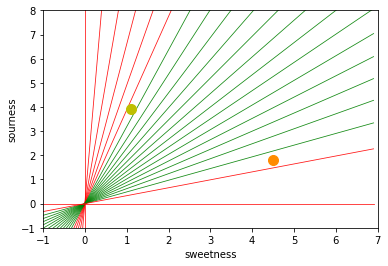

In [87]:
import numpy as np
import matplotlib.pyplot as plt
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line,
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance

orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]
fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]): 
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o",color="darkorange",markersize=size)
    else:
        ax.plot(x, y, "oy",markersize=size)
plt.show()




### Augmentons le nombre d'éléments de notre dataset chacun de ces éléments appartenant à une classe au plus

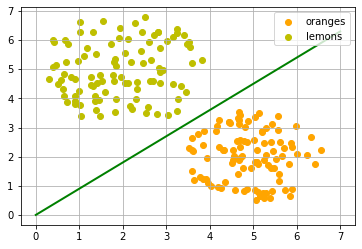

In [88]:
import numpy as np
import matplotlib.pyplot as plt
def points_within_circle(radius,
    center=(0, 0),
    number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y

X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
ax.plot(X, 0.9 * X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()

# On a donc augmenter le nombre d'oranges et de citrons mais le traçage de la ligne se fait toujours avec nos yeux, cherchons à 
# présent à le faire dynaamiquement



### programme python qui calcule une ligne de démarcation en parcourant tous les fruits et ajuste dynamiquement la pente de la ligne de partage que nous voulons calculer

Si un point est au-dessus de la ligne mais devrait être en dessous de la ligne, le
la pente sera incrémentée de la valeur de **learning_rate** . Si le point est en dessous de la ligne mais devrait être au-dessus de 
la ligne, la pente sera décrémentée de la valeur de **learning_rate** .


0.8999999999999999


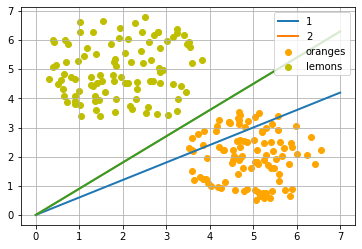

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
fruits = list(zip(oranges_x,oranges_y,repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,lemons_y,repeat(1, len(oranges_x))))
shuffle(fruits) 
def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
    #print(label, res)
        if label == 0 and res < 0:
    # point is above line but should be below
    # => increment slope
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X,linewidth=2, label=str(counter))
        elif label == 1 and res > 0:
    # point is below line but should be above
    # => decrement slope
    #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,linewidth=2, label=str(counter))
    return slope
slope = adjust()
print(slope)
ax.plot(X,slope * X,linewidth=2)
ax.legend()
ax.grid()
plt.show()

### Commençons par une pente différente du "côté citron"

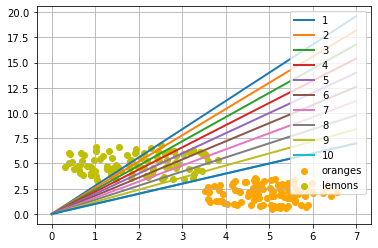

0.9999999999999996


In [90]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
slope = adjust(learning_rate=0.2, slope=3)
ax.plot(X,slope * X,linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)


## Un réseau de neurones simple: Perceptron simple

Nous allons définir un réseau de neurones pour classer les ensembles de données précédents. 

Notre réseau de neurones ne fera que
se compose d'un neurone

In [91]:
import numpy as np
class Perceptron:
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum
p = Perceptron(weights=[-0.45, 0.5])
for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")
for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")


-1.7701950057256954, -1.0422281688765087, -1.7523521701030111, -1.420325720876298, -1.41827263377732, -0.7981609811471722, -2.201060478768571, -1.8431503873929218, -1.7448086044906717, -1.401123909864479, 1.638823522229771, 1.1230636277150272, 0.49001962268051935, 1.6837701515027979, 1.7355377379507573, 2.6946783311262927, 1.877170345701136, 0.9432880328369704, 1.3859746264148838, 2.0695632673114837, 

### Nous pouvons voir que nous obtenons une valeur négative, si nous entrons une orange et une valeur posive, si nous entrons un citron. Avec cette connaissance, nous pouvons calculer la précision de notre réseau de neurones sur cet ensemble de données :


In [92]:
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
print(evaluation)


Counter({'corrects': 200})


Le principe est de multiplier chaque entrée par son poids et de les additionner

Examinons ce que nous obtenons si le calcul aboutit à 0

Utilisation de **la limite de décision**

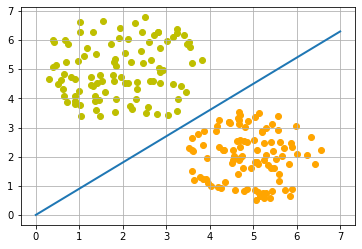

0.9


In [93]:
import time
import matplotlib.pyplot as plt
slope = 0.1
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")
slope = 0.45 / 0.5 # On a fait le rapport entre les poids des entrées du perceptron
ax.plot(X, slope * X, linewidth=2)
ax.grid()
plt.show()
print(slope)


## Entrainement d'un réseau de neurones
Précédement, on faisait juste des ajustements pour avoir le bon délimiteur, maintenant nous allons démontrer ce qui est néceccaire pour entrainer nos simples réseaux de neurones

Créons deux ensembles(test et entrainement) de façon aléatoire tout en controlant cet aléa avec random_state 

In [94]:
from sklearn.model_selection import train_test_split
import random
oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))
# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,[0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)
data, labels = zip(*labelled_data)
res = train_test_split(data, labels,train_size=0.8,test_size=0.2,random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])
# Le label 1 c'est pour le citron et 0 c'est pour l'orange

[(1.9202773733434646, 6.087359565915415), (3.44508961771494, 4.236928319895811), (3.267090300811942, 3.9709568684430567), (5.295685848053569, 0.7399170493681304), (2.8594397137332432, 4.5417698732198515), (4.561704348298831, 2.0093764425673446), (2.523465614037801, 3.495819382262513), (1.4836737645625464, 4.803491308502848), (4.736835437484473, 2.0141895966807755), (5.389359872429961, 0.5799883507357055)] [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


## Calcul de l'erreur
Avec cette erreur
nous devons ajuster les valeurs de poids avec une valeur incrémentielle c'est à dire: 

 w1 = w1 + Δw1 et
 
  w2 = w2 + Δw2


In [95]:
import numpy as np
from collections import Counter
class Perceptron:
    def __init__(self,
        weights,
        learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    def adjust(self,
        target_result,
        calculated_result,
        in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) #
            error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

p = Perceptron(weights=[0.1, 0.1],learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],
    p(train_data[index]),
    train_data[index])
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)


[('correct', 160)]
[('correct', 40)]
[-1.91799307  2.46620274]


Les résultats sont satisfaisants avec notre réseau de neurone 

###  visualisons la frontière de décision avec le programme suivant:

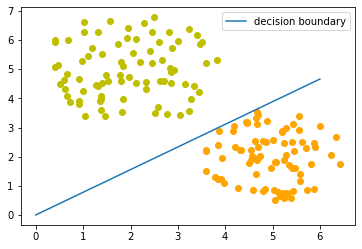

[-1.91799307  2.46620274]


In [96]:
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(0, 7)
fig, ax = plt.subplots()
lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)
ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")
w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

### Intéressons-nous à l'algorithme "in motion"

3 -12.204995721706519 [-1.48870575 -0.12197511] (5.295685848053569, 0.7399170493681304)
4 0.5085412653873141 [-0.63087384  1.24055585] (2.8594397137332432, 4.5417698732198515)
13 4.803270026805302 [-1.7928646   0.37325917] (3.8733025205372327, 2.8909889148536547)
14 0.5050021751488338 [-0.99549724  1.97127318] (2.6578911769752533, 5.3267133553724575)
15 2.30022982037506 [-2.55338043  1.11005449] (5.192943966481897, 2.87072897426804)
16 0.7777110306363544 [-1.91799307  2.46620274] (2.1179578610521586, 4.520494177892918)


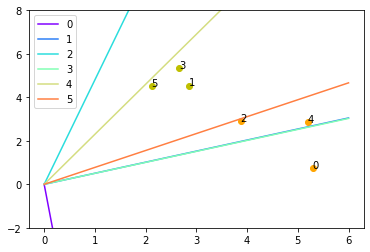

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
p = Perceptron(weights=[0.1, 0.1],
learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))
fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])
counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],
    p(train_data[index]),
    train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"
        ax.scatter(train_data[index][0],
        train_data[index][1],
        color=color)
        ax.annotate(str(counter),
        (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()

Chacun des points du diagramme ci-dessus provoque une modification des poids. On les voit numérotés dans l'ordre de
leur aspect et la droite correspondante

## RÉSEAUX DE NEURONES SIMPLES

### Perceptron pour la fonction AND

[]

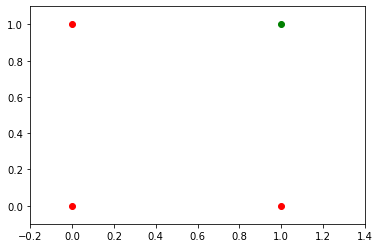

In [98]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()

### Un tel réseau neuronal primitif ne peut former que des lignes droites passant par l'origine

[]

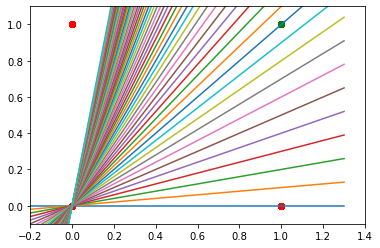

In [99]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
    ax.scatter(0, 0, color="r")
    ax.scatter(0, 1, color="r")
    ax.scatter(1, 0, color="r")
    ax.scatter(1, 1, color="g")
plt.plot()

# Comme ce cas de figure 


Pour notre cas, la droite d'équation y = − x + 1.2 peut séparer notre data set 

Il est tout simplement question de ne pas mettre c à 0 c'est à dire l'ordonnée à l'origine

[]

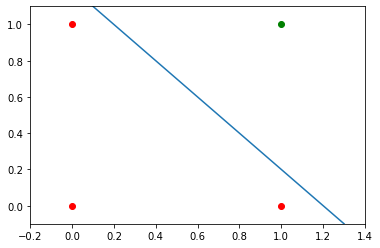

In [100]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()


La question est maintenant de savoir si on peut créer un perceptron capable de définir des frontières de décision arbitraires

Il faudra pour celà ajouter un noeud de biais, on se permet des erreurs

L'équation linéaire change et un nouveau paramètre est pris en compte: c = −(w3/w2)⋅ b

m reste toujours: m = -w1/w2

## Bout de code du fichier perceptrons.py

In [102]:
import numpy as np
from collections import Counter
class Perceptron:
    def __init__(self,weights,bias=1,learning_rate=0.3):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
    @staticmethod
    def unit_step_function(x):
        if x <= 0:
            return 0
        else:
            return 1
    def __call__(self, in_data):
        in_data = np.concatenate( (in_data, [self.bias]) )
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    def adjust(self,target_result,in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) #
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
p = Perceptron(weights=[0.3, 0.3, 0.3],learning_rate=0.2)

for in_data, label in labelled_samples(30):
    p.adjust(label,in_data)
    

In [103]:
import numpy as np
test_data, test_labels = list(zip(*labelled_samples(30)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)



Counter({'correct': 30})


## Affichage

-3.0000000000000004 3.0000000000000013


[]

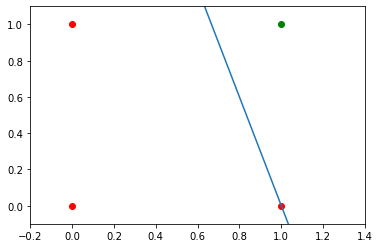

In [104]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()


utilisons la fonction **make_blobs** de sklearn.datasets pour appliquer sur le cas des données qui ont besoin d'un noeud de biais pour etre linéairement séparable

In [105]:
from sklearn.datasets import make_blobs
n_samples = 250
samples, labels = make_blobs(n_samples=n_samples,centers=([2.5, 3], [6.7, 7.9]),random_state=0)


### Visualisons les données crées ci-dessus

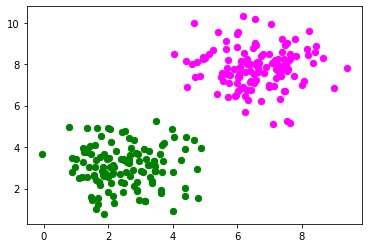

In [106]:
import matplotlib.pyplot as plt
colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],c=colours[n_class], s=40, label=str(n_class))


### Division du jeu de données

In [107]:
# Division 
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]

# Evaluation
p = Perceptron(weights=[0.3, 0.3, 0.3],
learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
    p.adjust(label,sample)
    evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)


Counter({'correct': 200})


### Visualisation

-1.5513529034664024 11.736643489707035


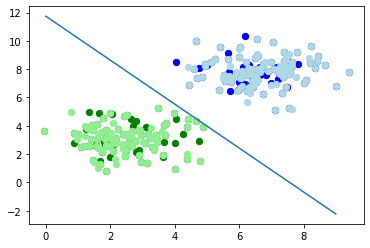

In [108]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0],
    learn_data[learn_labels==n_class][:, 1],
    c=colours[n_class], s=40, label=str(n_class))
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
    test_data[test_labels==n_class][:, 1],
    c=colours[n_class], s=40, label=str(n_class))
    
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()


### Dans la section suivante, nous présenterons le problème XOR pour les réseaux de neurones ajoutons une couche cachée
Ce problème ne peut pas etre résolu avec un perceptron simple

La **couche cachée** va donc permettre de réorganiser les données entrées

## EXERCICE: FONCTION LOGIQUE AND

    Exercice 1
Essayez de former un réseau de neurones avec un seul perceptron.

Pourquoi ça ne marche pas ?
    
    Exercice 2
Un point appartient à une classe 0, si x1
< 0,5 et appartient à la classe 1, si x1>= 0,5. Former un réseau avec un
perceptron pour classer des points arbitraires. Que pouvez-vous dire à propos de la limite de décision ? Qu'en est-il de l'entrée
valeurs x2

In [109]:
## Solution 1

#from perceptrons import Perceptron

# Utilisation de la classe Perceptron du fichier perceptrons.py

p = Perceptron(weights=[0.3, 0.3, 0.3],
bias=1,
learning_rate=0.2)
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)
for in_data, label in labelled_samples(30):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*labelled_samples(60)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)




Counter({'correct': 52, 'wrong': 8})


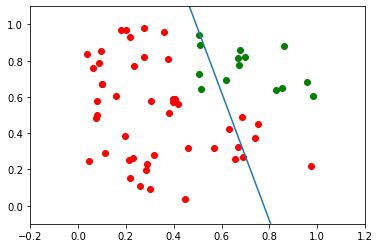

In [110]:
## Visualisation

import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")


On observe alors que ces données ne peuvent pas etre séparées linéairement 

In [111]:
# Solution 2

# Du fichier perceptrons.py
#from perceptrons import Perceptron

import numpy as np
from collections import Counter
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 0) if s[0] < 0.5 else (s, 1)

p = Perceptron(weights=[0.3, 0.3, 0.3],
learning_rate=0.4)
for in_data, label in labelled_samples(300):
    p.adjust(label,in_data)
test_data, test_labels = list(zip(*labelled_samples(500)))
print(p.weights)
p.evaluate(test_data, test_labels)


[ 1.83878875  0.00494856 -0.9       ]


Counter({'correct': 494, 'wrong': 6})

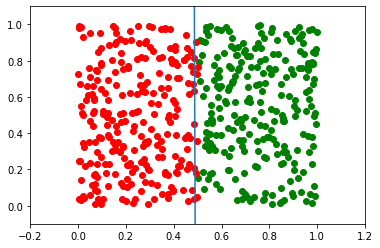

In [112]:
# Visualisation

import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [105]:
p.weights, m ## La pente devient de plus en plus grande dans ce genre de situation 

(array([ 2.14731506, -0.0420439 , -0.9       ]), 51.07316401834725)

## RÉSEAUX DE NEURONES, STRUCTURE, POIDS ET MATRICES

In [113]:
## Représentation d'un vecteur unidimensionnel en numpy afin de représentrer les entrées de notre réseau de neurones

import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)


[ 2  4 11]


Pour le faire passer à notre réseau, nous devons transposer ce vecteur pour le mettre en vecteur colonne


In [114]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)


The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


## WEIGHTS AND MATRICES
## INITIALIZING THE WEIGHT MATRICES

In [115]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


L'histogramme des échantillons, créé avec la fonction uniforme ressemble à ceci

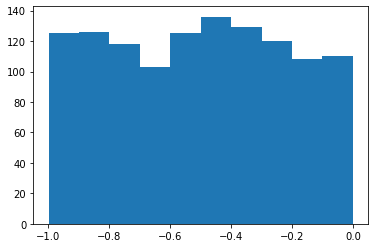

In [116]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()


Examinons la fonction 'binomial' de numpy.binomia 

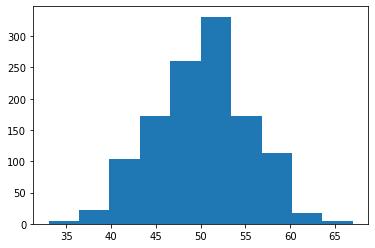

In [117]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()


Utilisons **truncnorm** de **scipy.stats** pour créer des nombres aléatoires avec une distribution normale, mais les nombres doivent être bornés.

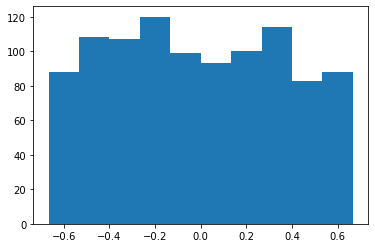

In [118]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()


Utilisons  **truncated_normal** pour la meme tache que précédement car **truncnorm** est commpliqué à utiliser

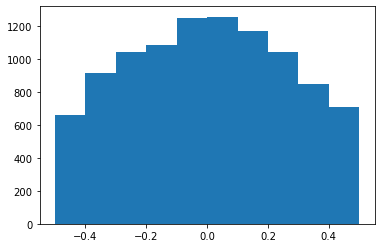

In [119]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()


### Autres exemples

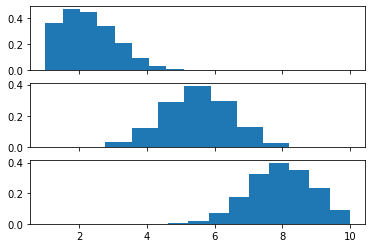

In [120]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()


### Création de la matrice de poids entre la couche d'entrée et la couche cachée (wih)

In [121]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes)) 
wih

array([[-0.53467854,  0.23797048,  0.18713915],
       [ 0.28202401, -0.06159618, -0.04677912],
       [ 0.55271684,  0.5643003 ,  0.17204998],
       [ 0.42248973,  0.509764  ,  0.43651848]])

### Création de la matrice de poids entre la  couche cachée et la couche de sortie (who)

In [122]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[-0.26205293,  0.17991362,  0.32182592,  0.30418911],
       [-0.11759584, -0.10431859,  0.10750724,  0.46533317]])

## EXPLOITER UN RÉSEAU DE NEURONES AVEC PYTHON

Implémentation d'une classe de réseau neuronal appliquant les connaissances que nous
développé précédemment  

In [153]:
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
        self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
        self.no_of_hidden_nodes))
    def train(self):
        pass

    def run(self):
        pass


### Commençons par regarder le matrice des poids

In [154]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,no_of_out_nodes = 2,no_of_hidden_nodes = 4,learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)


[[ 0.15998979 -0.47933186  0.01338483]
 [-0.56648048  0.25664004 -0.15091095]
 [ 0.40559786 -0.27176833 -0.12246269]
 [-0.52225171 -0.40300073  0.5253818 ]]
[[ 0.43991525 -0.28882738  0.34744054 -0.43851249]
 [-0.10280703  0.28215954 -0.36459994  0.06970996]]


## FONCTION D' ACTIVATION, SIGMOID ET RELU

Utilisons **matplotlib** pour tracer la fonction **sigmoid**

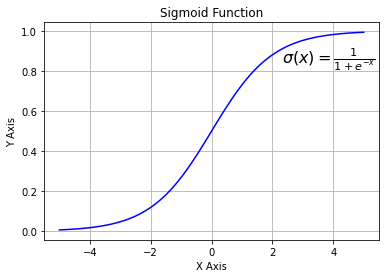

In [155]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

### Représentation de la dérivée dans la rétropropagation

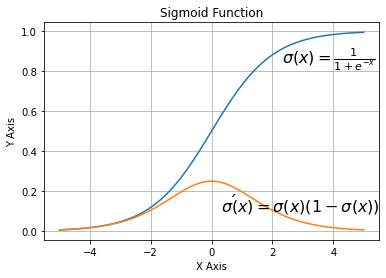

In [161]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()


Construisons la fonction **sigmoid** avec **explit** de **scipy.special**

In [162]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


Définir notre propre fonction sigmoïde avec le décorateur vectorize de numpy

In [163]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])

array([0.95257413, 0.98201379, 0.99330715])

### Fonction ReLU : Définition et représentation

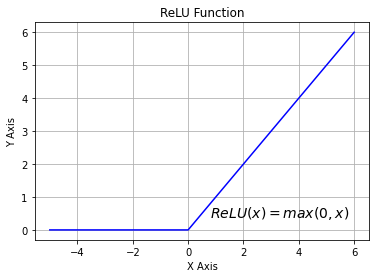

In [164]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)
# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()


## AJOUTER UNE MÉTHODE D'EXÉCUTION

Nous allons utiliser **scipy.special** comme fonction d'activation et le renommer en
**activation_function** :

La fonction **run** fera:

1. Multiplication matricielle du vecteur d'entrée et de la matrice weights_in_hidden.
2. Application de la fonction d'activation au résultat de l'étape 1
3. Multiplication matricielle du vecteur résultat de l'étape 2 et de la matrice weights_in_hidden.
4. Pour obtenir le résultat final : Appliquer la fonction d'activation au résultat de 3


In [165]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
        al network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        pass
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden@ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector




### Dans l'exemple suivant nous créer un réseau avec deux nœuds d'entrée, quatre nœuds cachés et deux nœuds de sortie.

In [166]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
no_of_out_nodes=2,
no_of_hidden_nodes=4,
learning_rate=0.6)

Le résultat de l'appel est défini par les valeurs aléatoires des poids

In [167]:
simple_network.run([(3, 4)])

array([[0.65022244],
       [0.35765872]])

## RÉTROPROPAGATION DANS LES RÉSEAUX DE NEURONES

## ENTRAÎNER UN RÉSEAU DE NEURONES AVEC PYTHON

Nous calculons le
**output_error** en soustrayant la sortie du réseau **output_vector_network** de la
**vecteur_cible** .

Nous créons les données avec **make_blobs** à partir de
**sklearn.datasets** pour tester notre classe de réseau de neurone

## Bout de code du fichier neural_networks1 

In [176]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
        al network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
        self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
        self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuples, lists or nda
        rrays
        """
        # make sure that the vectors have the right shape
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)
        
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = activation_function(self.weights_in_hidden@ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    
    def evaluate(self, data, labels):
        """
        Counts how often the actual result corresponds to the
        target result.
        A result is considered to be correct, if the index of
        the maximal value corresponds to the index with the "1"
        in the one-hot representation,
        e.g.
        res = [0.1, 0.132, 0.875]
        labels[i] = [0, 0, 1]
        """
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

In [168]:
from sklearn.datasets import make_blobs
n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples,centers=blob_centers,random_state=7)


Visualisons les données que nous venons de créer

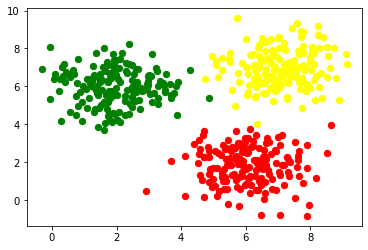

In [169]:
import matplotlib.pyplot as plt
colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()
for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:, 0],
    data[labels==n_class][:, 1],
    c=colours[n_class],
    s=40,
    label=str(n_class))

Nous avons donc deux classes

Mais les étiquettes sont mal représentées et sont dans un vecteur unidimensionnel

In [170]:
labels[:7]

array([2, 2, 1, 0, 2, 0, 1])

Nous avons besoin d'une représentation unique pour chaque étiquette, afin de pallier à cette mauvaise représentation décrite ci-dessus

In [171]:
import numpy as np
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:7]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

Nous pouvons maintenant  créer un train et un jeu de données de test 

In [172]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels,train_size=0.8,test_size=0.2,random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

Nous créons un réseau de neurones avec deux nœuds d'entrée et trois nœuds de sortie

In [180]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
no_of_out_nodes=3,
no_of_hidden_nodes=5,
learning_rate=0.3)

La prochaine étape consiste à entraîner notre réseau avec les données et les étiquettes de nos échantillons d'entraînement

In [181]:
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])

Evaluons maintenant notre modèle avec la fonction **evaluate** de notre classe neuronale

In [182]:
simple_network.evaluate(train_data, train_labels)

(390, 10)

## Bout de code du fichier neural_networks2

In [191]:
import numpy as np
from scipy.stats import truncnorm
from scipy.special import expit as activation_function
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate,bias=None):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
        al
        network with optional bias nodes"""
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes+ bias_node))
        
    def train(self, input_vector, target_vector):
        """ input_vector and target_vector can be tuple, list or n
        darray """
        # make sure that the vectors have the right shap
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size,
        1)
        if self.bias:
        # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [[self.bias]]) )
            target_vector = np.array(target_vector).reshape(target_vector.size, 1)
            output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
            # update the weights:
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = (tmp @input_vector.T)[:-1,:] # last row cut off,
        else:
            x = tmp @ input_vector.T
        self.weights_in_hidden += self.learning_rate * x
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [[1]]) )
            input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            input4hidden = np.concatenate( (input4hidden, [[1]]) )
            output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
            return output_vector_network
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs





## RÉSEAU DE NEURONES AVEC NŒUDS DE BIAS

Les nœuds de biais sont utilisés pour augmenter la flexibilité du réseau pour adapter
les données

Nous pouvons réutiliser nos classes précédemment créées pour tester notre classifieur

In [184]:
simple_network = NeuralNetwork(no_of_in_nodes=2,no_of_out_nodes=3,no_of_hidden_nodes=5,learning_rate=0.1,bias=1)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)


(326, 74)

## EXERCICE

Créer un Réseau de neurones pour classer les 'fleurs' du fichier strange_flowers.txt de notre ancien TP 

Nous avons copié et avons mis dans le mm repertoire de travail que ce 5ème TP

In [185]:
# Solution 

c = np.loadtxt("strange_flowers.txt", delimiter=" ")
data = c[:, :-1]
n_classes = data.shape[1]
labels = c[:, -1]
data[:5]


array([[243.  , 113.  ,   8.  ,   3.54],
       [253.  , 123.  ,   1.  ,   3.66],
       [240.  , 104.  ,   1.  ,   3.75],
       [247.  ,  94.  ,   7.  ,   4.2 ],
       [243.  ,  98.  ,  14.  ,   3.49]])

In [186]:
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:3]


array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

Mettons nos données à l'échelle en utilisant la fonction scale de sklearn/preprocessing 

Elle normalise un ensemble de données le long de n'importe quel axe.

In [187]:
from sklearn import preprocessing
data = preprocessing.scale(data)
data[:5]
data.shape
labels.shape


(795, 4)

In [188]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels,
train_size=0.8,
test_size=0.2,
random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

## Bout de code du fichier neural_networks2 avec biais = 0.2 dans la fonction ___init___

In [193]:
import numpy as np
from scipy.stats import truncnorm
from scipy.special import expit as activation_function
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,no_of_in_nodes,no_of_out_nodes,no_of_hidden_nodes,learning_rate,bias=0.2):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.learning_rate = learning_rate
        self.bias = bias
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
        al
        network with optional bias nodes"""
        bias_node = 1 if self.bias else 0
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes + bias_node))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,self.no_of_hidden_nodes+ bias_node))
        
    def train(self, input_vector, target_vector):
        """ input_vector and target_vector can be tuple, list or n
        darray """
        # make sure that the vectors have the right shap
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size,
        1)
        if self.bias:
        # adding bias node to the end of the input_vector
            input_vector = np.concatenate( (input_vector, [[self.bias]]) )
            target_vector = np.array(target_vector).reshape(target_vector.size, 1)
            output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            output_vector_hidden = np.concatenate( (output_vector_hidden, [[self.bias]]) )
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
            # update the weights:
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        if self.bias:
            x = (tmp @input_vector.T)[:-1,:] # last row cut off,
        else:
            x = tmp @ input_vector.T
        self.weights_in_hidden += self.learning_rate * x
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        if self.bias:
            # adding bias node to the end of the inpuy_vector
            input_vector = np.concatenate( (input_vector, [[1]]) )
            input4hidden = activation_function(self.weights_in_hidden @ input_vector)
        if self.bias:
            input4hidden = np.concatenate( (input4hidden, [[1]]) )
            output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
            return output_vector_network
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs





In [194]:
simple_network = NeuralNetwork(no_of_in_nodes=4,
no_of_out_nodes=4,
no_of_hidden_nodes=20,
learning_rate=0.3)
for i in range(len(train_data)):
    simple_network.train(train_data[i], train_labels[i])
simple_network.evaluate(train_data, train_labels)

(483, 153)

## SOFTMAX COMME  FONCTION D'ACTIVATION

In [195]:
import numpy as np
def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x)
    return e_x / e_x.sum()
x = np.array([1, 0, 3, 5])
y = softmax(x)
y, x / x.sum()


(array([0.01578405, 0.00580663, 0.11662925, 0.86178007]),
 array([0.11111111, 0.        , 0.33333333, 0.55555556]))

In [198]:
import numpy as np
def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()
softmax(x)


array([0.01578405, 0.00580663, 0.11662925, 0.86178007])

## Dérivée de la fonction SOFTMAX

In [200]:
import numpy as np
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()
s = softmax(np.array([0, 4, 5]))
si_sj = - s * s.reshape(3, 1)
print(s)
print(si_sj)
s_der = np.diag(s) + si_sj
s_der


[0.00490169 0.26762315 0.72747516]
[[-2.40265555e-05 -1.31180548e-03 -3.56585701e-03]
 [-1.31180548e-03 -7.16221526e-02 -1.94689196e-01]
 [-3.56585701e-03 -1.94689196e-01 -5.29220104e-01]]


array([[ 0.00487766, -0.00131181, -0.00356586],
       [-0.00131181,  0.196001  , -0.1946892 ],
       [-0.00356586, -0.1946892 ,  0.19825505]])

In [201]:
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
    (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

    @np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()
class NeuralNetwork:
    def __init__(self,
        no_of_in_nodes,
        no_of_out_nodes,
        no_of_hidden_nodes,
        learning_rate,
        softmax=True):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.softmax = softmax
        self.create_weight_matrices()
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
        al network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
        self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        """
        input_vector and target_vector can be tuples, lists or nda
        rrays
        """
        # make sure that the vectors have the right shape
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ output_vector_hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ output_vector_hidden)
            output_error = target_vector - output_vector_network
        if self.softmax:
            ovn = output_vector_network.reshape(output_vector_network.size,)
            si_sj = - ovn * ovn.reshape(self.no_of_out_nodes, 1)
            s_der = np.diag(ovn) + si_sj
            tmp = s_der @ output_error
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        else:
            tmp = output_error * output_vector_network * (1.0 - output_vector_network)
            self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
            # calculate hidden errors:
            hidden_errors = self.weights_hidden_out.T @ output_error
            # update the weights:
            tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
            self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'.
        'input_vector' can be tuple, list or ndarray
        """
        # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = sigmoid(self.weights_in_hidden @ input_vector)
        if self.softmax:
            output_vector_network = softmax(self.weights_hidden_out @ input4hidden)
        else:
            output_vector_network = sigmoid(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs






IndentationError: unexpected unindent (<ipython-input-201-42b23c5de7e3>, line 7)